In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [215]:
df = pd.read_csv('telecom_customer_churn.csv')

In [216]:
df

Customer ID  Gender  Age Married  Number of Dependents          City  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
2     0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0      Martinez   
4     0013-EXCHZ  Female   75     Yes                     0     Camarillo   
...          ...     ...  ...     ...                   ...           ...   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7040  9992-UJOEL    Male   22      No                     0           Elk   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code  Number of Referrals  Tenure in Months     Offer  ...  \
0        93225                    2                 9  No Offer  ...   
1        91206                    0                 9  No Offer  ...   
2        92627                    0                 4   Offer E  ...   
3        94553                    1                13   Offer D  ...   
4        93010                    3                 3  No Offer  ...   
...        ...                  ...               ...       ...  ...   
7038     91941                    0                13   Offer D  ...   
7039     95367                    1                22   Offer D  ...   
7040     95432                    0                 2   Offer E  ...   
7041     92075                    5                67   Offer A  ...   
7042     96125                    1                63  No Offer  ...   

     Paperless Billing   Payment Method Monthly Charge Total Charges  \
0                  Yes      Credit Card          65.60        593.30   
1                   No      Credit Card          -4.00        542.40   
2                  Yes  Bank Withdrawal          73.90        280.85   
3                  Yes  Bank Withdrawal          98.00       1237.85   
4                  Yes      Credit Card          83.90        267.40   
...                ...              ...            ...           ...   
7038                No      Credit Card          55.15        742.90   
7039               Yes  Bank Withdrawal          85.10       1873.70   
7040               Yes      Credit Card          50.30         92.75   
7041                No      Credit Card          67.85       4627.65   
7042                No  Bank Withdrawal          59.00       3707.60   

     Total Refunds  Total Extra Data Charges Total Long Distance Charges  \
0             0.00                         0                      381.51   
1            38.33                        10                       96.21   
2             0.00                         0                      134.60   
3             0.00                         0                      361.66   
4             0.00                         0                       22.14   
...            ...                       ...                         ...   
7038          0.00                         0                      606.84   
7039          0.00                         0                      356.40   
7040          0.00                         0                       37.24   
7041          0.00                         0                      142.04   
7042          0.00                         0                        0.00   

     Total Revenue Customer Status   Churn Category  
0           974.81          Stayed      Not Churned  
1           610.28          Stayed      Not Churned  
2           415.45         Churned       Competitor  
3          1599.51         Churned  Dissatisfaction  
4           289.54         Churned  Dissatisfaction  
...            ...             ...              ...  
7038       1349.74          Stayed      Not Churned  
7039 

In [217]:
df.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing        

In [218]:
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming 

In [219]:
df.describe()

Age  Number of Dependents      Zip Code  Number of Referrals  \
count  7043.000000           7043.000000   7043.000000          7043.000000   
mean     46.509726              0.468692  93486.070567             1.951867   
std      16.750352              0.962802   1856.767505             3.001199   
min      19.000000              0.000000  90001.000000             0.000000   
25%      32.000000              0.000000  92101.000000             0.000000   
50%      46.000000              0.000000  93518.000000             0.000000   
75%      60.000000              0.000000  95329.000000             3.000000   
max      80.000000              9.000000  96150.000000            11.000000   

       Tenure in Months  Avg Monthly Long Distance Charges  \
count       7043.000000                        7043.000000   
mean          32.386767                          22.958954   
std           24.542061                          15.448113   
min            1.000000                           0.000000   
25%            9.000000                           9.210000   
50%           29.000000                          22.890000   
75%           55.000000                          36.395000   
max           72.000000                          49.990000   

       Avg Monthly GB Download  Monthly Charge  Total Charges  Total Refunds  \
count              7043.000000     7043.000000    7043.000000    7043.000000   
mean                 20.515405       63.596131    2280.381264       1.962182   
std                  20.418940       31.204743    2266.220462       7.902614   
min                   0.000000      -10.000000      18.800000       0.000000   
25%                   3.000000       30.400000     400.150000       0.000000   
50%                  17.000000       70.050000    1394.550000       0.000000   
75%                  27.000000       89.750000    3786.600000       0.000000   
max                  85.000000      118.750000    8684.800000      49.790000   

       Total Extra Data Charges  Total Long Distance Charges  Total Revenue  
count               7043.000000                  7043.000000    7043.000000  
mean                   6.860713                   749.099262    3034.379056  
std                   25.104978                   846.660055    2865.204542  
min                    0.000000                     0.000000      21.360000  
25%                    0.000000                    70.545000     605.610000  
50%                    0.000000                   401.440000    2108.640000  
75%                    0.000000                  1191.100000    4801.145000  
max                  150.000000                  3564.720000   11979.340000

In [220]:
print(df["Customer Status"].unique())

df.shape[0]

['Stayed' 'Churned' 'Joined']


7043

In [221]:
df['Churn'] = np.where(df['Customer Status'] == 'Churned', 1, 0)


## Train-Test Split

In [228]:
x = df.drop(columns=['Churn', 'Customer Status', 'Customer ID', 'City'])
y = df['Churn']

# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=30)

# Output the shapes of the resulting datasets
print("Training set shape (X_train):", x_train.shape)
print("Training set shape (y_train):", y_train.shape)
print("Test set shape (X_test):", x_test.shape)
print("Test set shape (y_test):", y_test.shape)

Training set shape (X_train): (5986, 32)
Training set shape (y_train): (5986,)
Test set shape (X_test): (1057, 32)
Test set shape (y_test): (1057,)


In [229]:
print("Training set target distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set target distribution:")
print(y_test.value_counts(normalize=True))

Training set target distribution:
Churn
0    0.734547
1    0.265453
Name: proportion, dtype: float64

Test set target distribution:
Churn
0    0.735099
1    0.264901
Name: proportion, dtype: float64


## Exploratory Data Analysis (EDA)

In [230]:
train_data = x_train.copy()
train_data['Churn'] = y_train

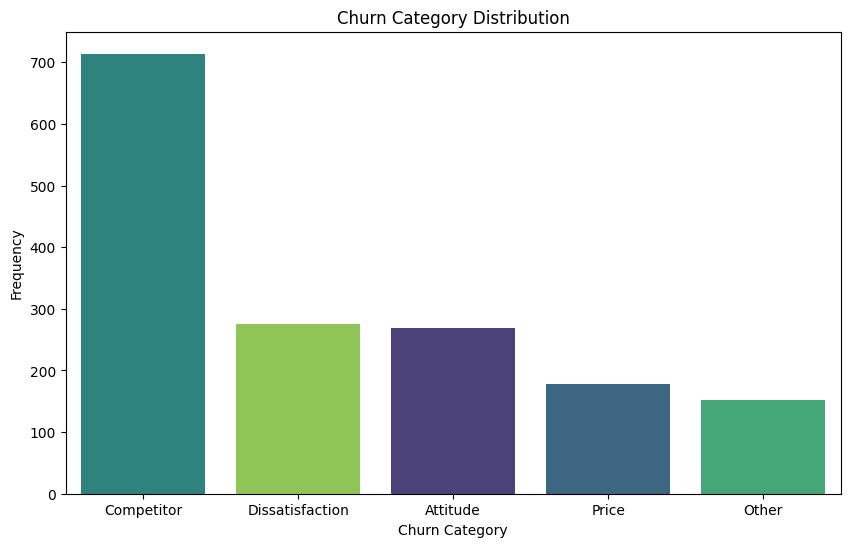

In [231]:
filtered_df = train_data[train_data['Churn Category'] != 'Not Churned']
churn_category_counts = filtered_df['Churn Category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Churn Category',hue='Churn Category', order=churn_category_counts.index, palette='viridis')
plt.title('Churn Category Distribution')
plt.xlabel('Churn Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

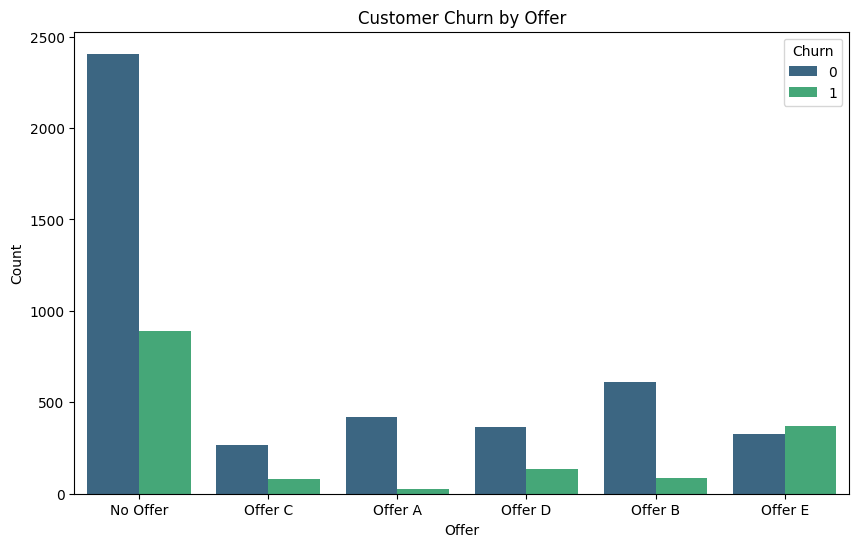

In [232]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Offer', hue='Churn', palette='viridis')
plt.title('Customer Churn by Offer')
plt.xlabel('Offer')
plt.ylabel('Count')
plt.show()

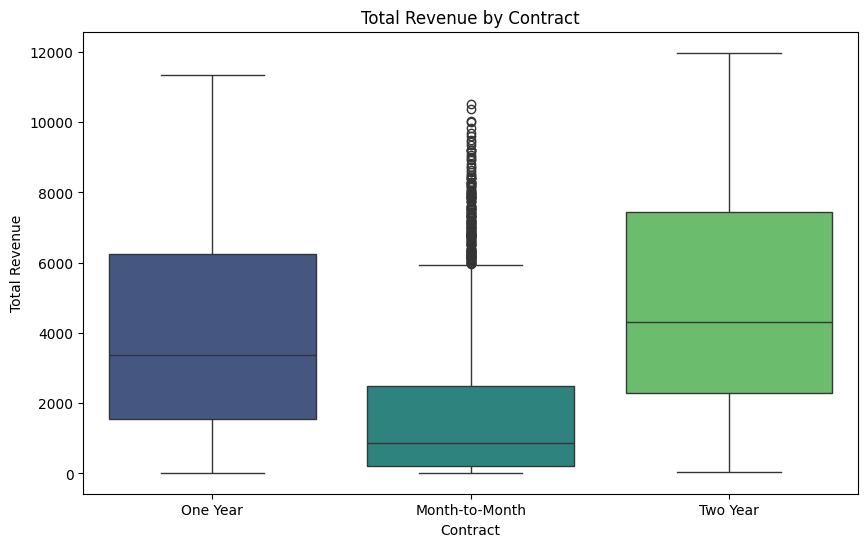

In [233]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='Contract', y='Total Revenue', hue = 'Contract', palette='viridis')
plt.title('Total Revenue by Contract')
plt.xlabel('Contract')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

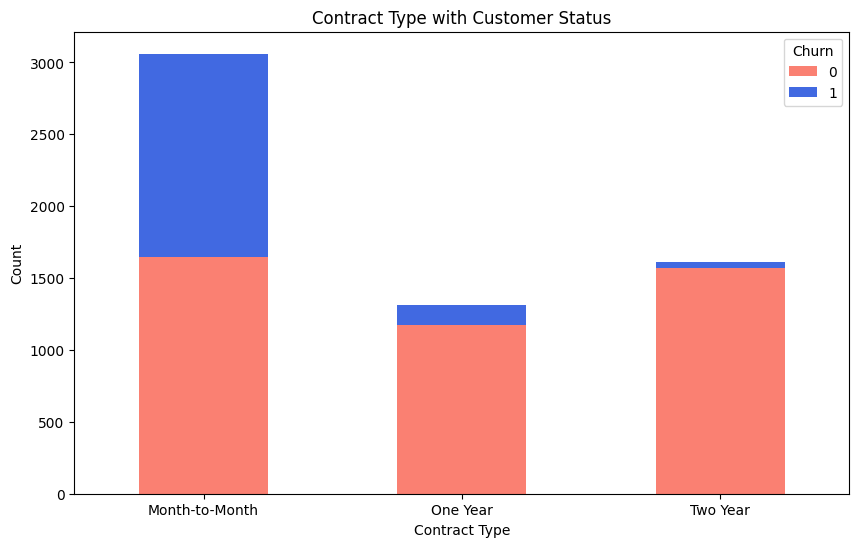

In [234]:
stacked_data = train_data.groupby(['Contract', 'Churn']).size().unstack()
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'royalblue', 'green'])
plt.title('Contract Type with Customer Status')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

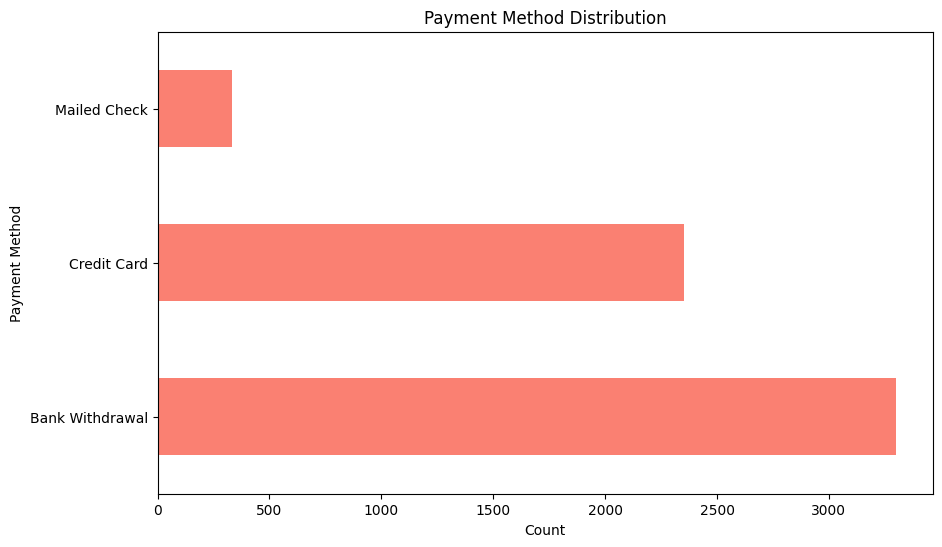

In [235]:
plt.figure(figsize=(10, 6))
train_data['Payment Method'].value_counts().plot(kind='barh', color='salmon')
plt.title('Payment Method Distribution')
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.show()

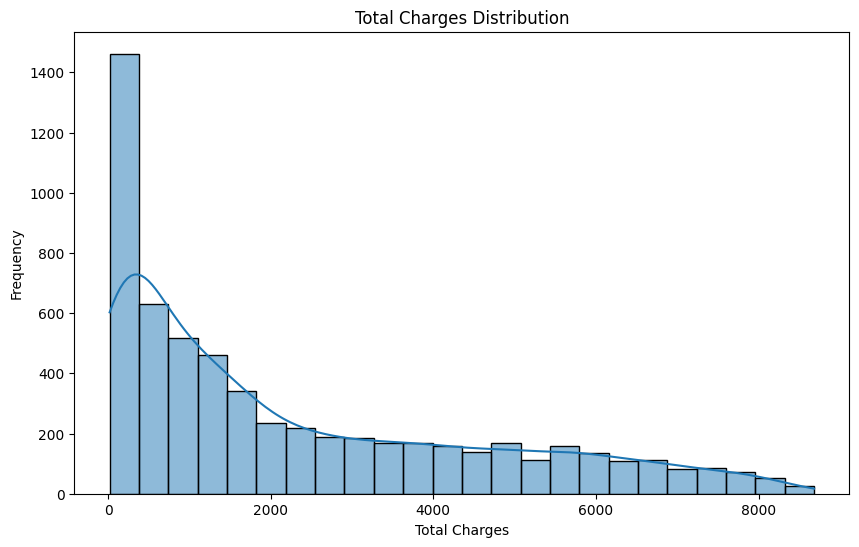

In [236]:
plt.figure(figsize=(10, 6))
sns.histplot(data = train_data, x= 'Total Charges', kde=True)
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

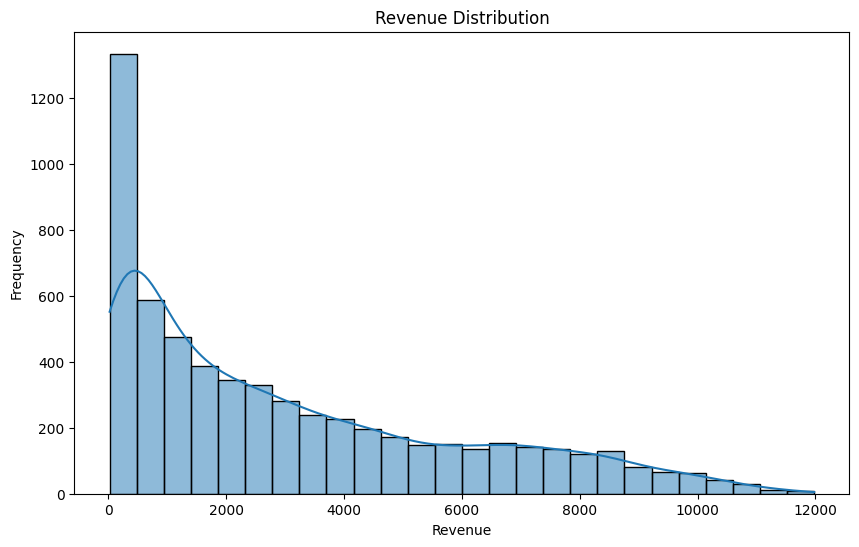

In [237]:
plt.figure(figsize=(10, 6))
sns.histplot(data = train_data, x= 'Total Revenue', kde=True)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

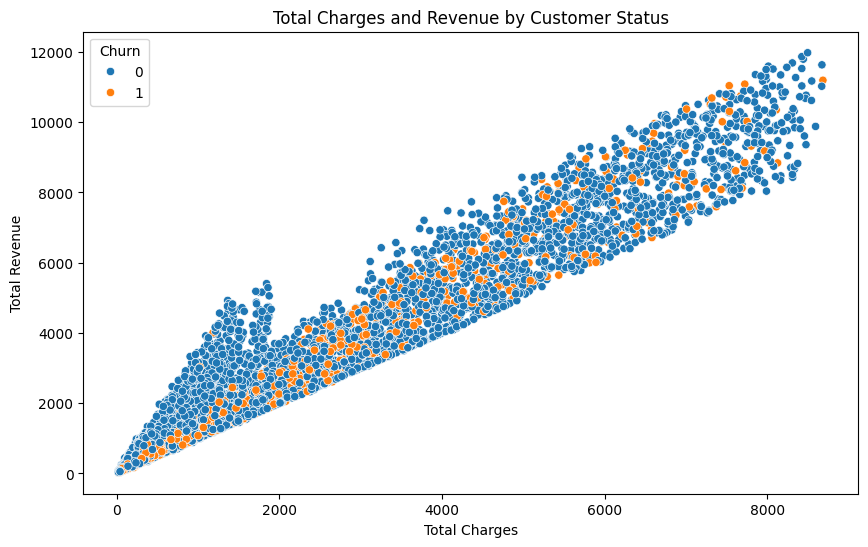

In [238]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='Total Charges', y='Total Revenue', hue='Churn')
plt.title('Total Charges and Revenue by Customer Status')
plt.xlabel('Total Charges')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

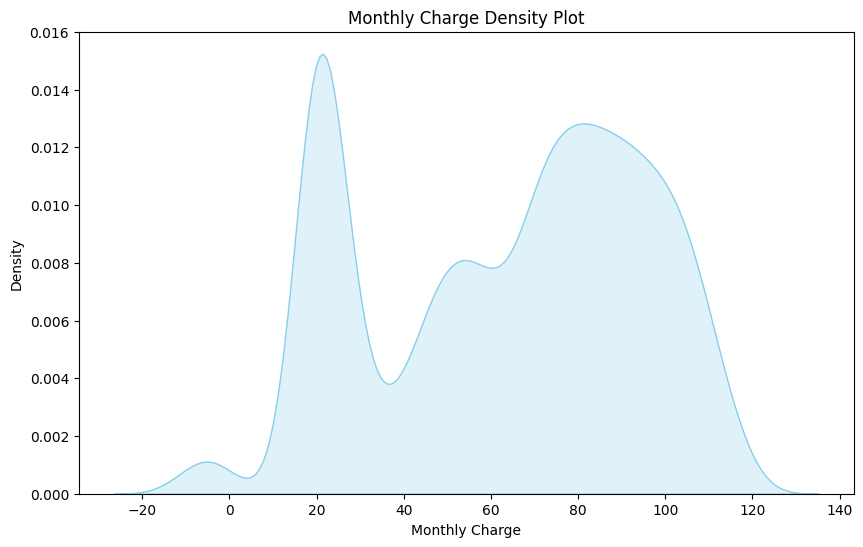

In [239]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train_data['Monthly Charge'], fill=True, color='skyblue')
plt.title('Monthly Charge Density Plot')
plt.xlabel('Monthly Charge')
plt.ylabel('Density')
plt.show()

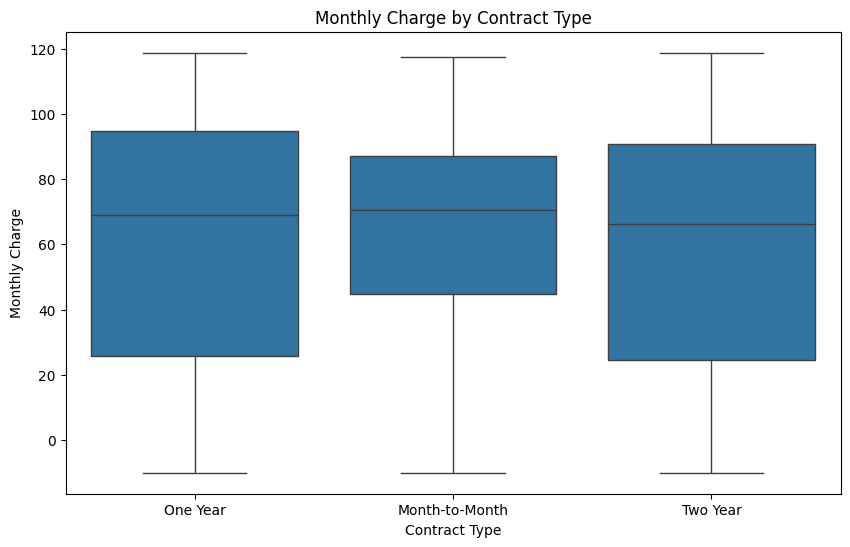

In [240]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='Contract', y='Monthly Charge')
plt.title('Monthly Charge by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charge')
plt.show()

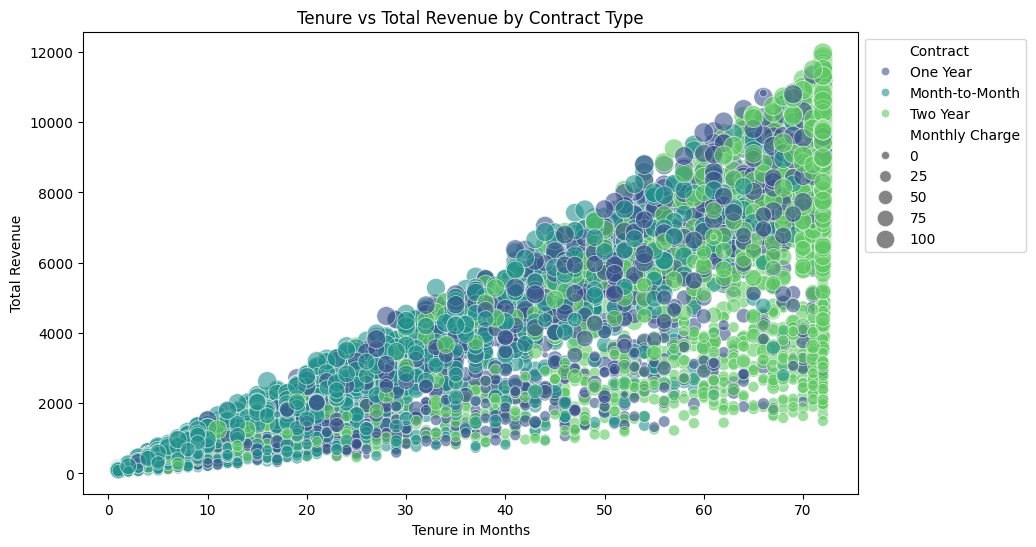

In [241]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='Tenure in Months', y='Total Revenue', hue='Contract', size='Monthly Charge', sizes=(20, 200), alpha=0.6, palette='viridis')
plt.title('Tenure vs Total Revenue by Contract Type')
plt.xlabel('Tenure in Months')
plt.ylabel('Total Revenue')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


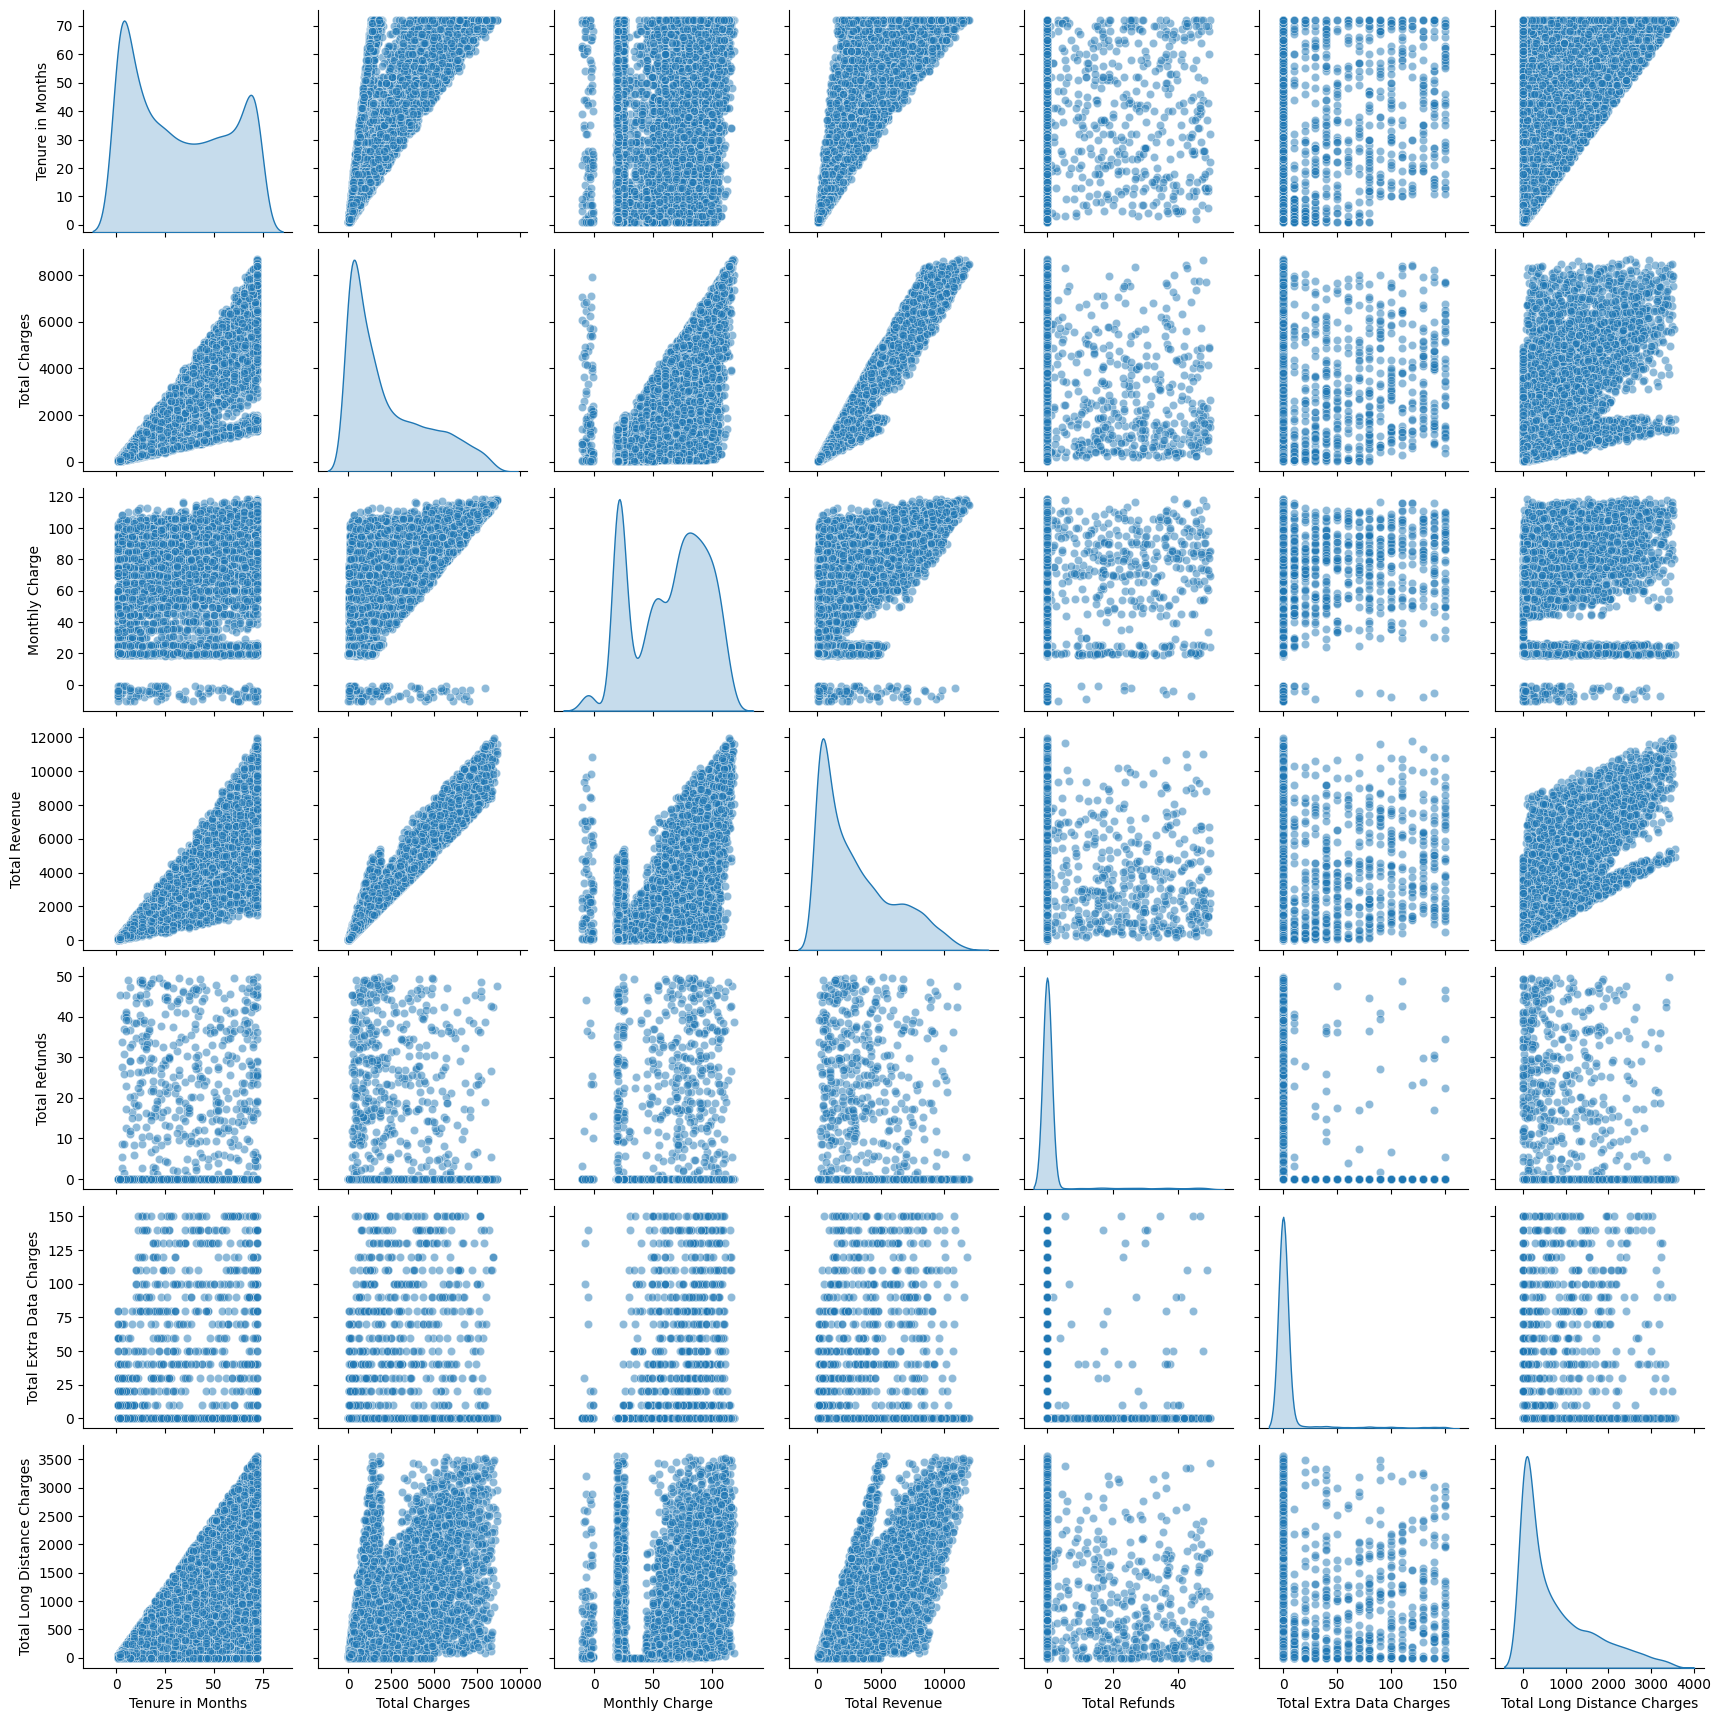

In [242]:
sns.pairplot(train_data[['Tenure in Months',
                 'Total Charges', 
                 'Monthly Charge', 
                 'Total Revenue', 'Total Refunds', 
                 'Total Extra Data Charges', 
                 'Total Long Distance Charges']], diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

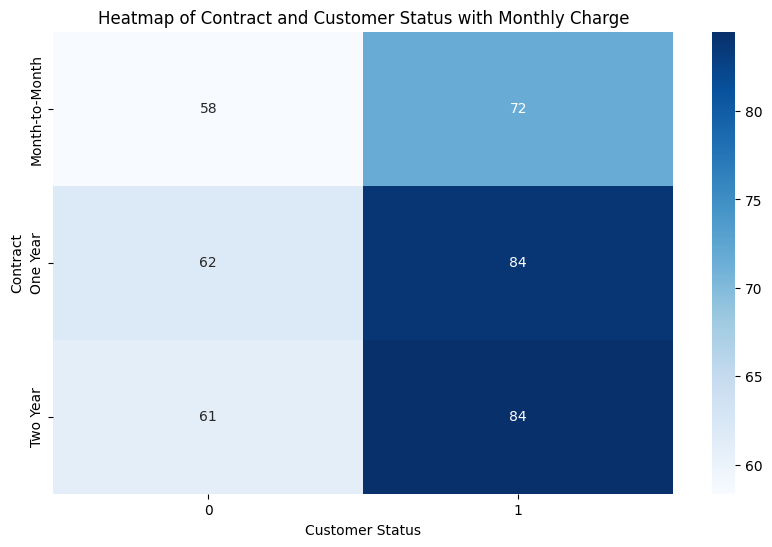

In [243]:
pivot_table = train_data.pivot_table(index='Contract', columns='Churn', values='Monthly Charge', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues')
plt.title('Heatmap of Contract and Customer Status with Monthly Charge')
plt.xlabel('Customer Status')
plt.ylabel('Contract')
plt.show()

## Feature Engineering

### Frequency Encoding

In [244]:
zip_freq = x_train['Zip Code'].value_counts().to_dict()
x_train['Zip_Code_freq'] = x_train['Zip Code'].map(zip_freq)
x_test['Zip_Code_freq'] = x_train['Zip Code'].map(zip_freq)

### Equal Binning

In [245]:
n_bins = 5
bin_edges = np.linspace(x_train['Age'].min(), x_train['Age'].max(), n_bins + 1)
rounded_bin_edges = np.round(bin_edges, 0)
labels = [f'_{int(rounded_bin_edges[i])}_{int(rounded_bin_edges[i+1])}' for i in range(len(rounded_bin_edges)-1)]

x_train['Age_bin'] = pd.cut(x_train['Age'], bins=rounded_bin_edges, labels=labels, include_lowest=True)
x_test['Age_bin'] = pd.cut(x_test['Age'], bins=rounded_bin_edges, labels=labels, include_lowest=True)


### Binary Column Conversion

In [246]:
binary_columns = [
    'Married', 'Phone Service', 'Multiple Lines', 'Internet Service', 
    'Online Security', 'Online Backup', 'Device Protection Plan', 
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 
    'Streaming Music', 'Unlimited Data', 'Paperless Billing'
]
x_train[binary_columns] = x_train[binary_columns].map(lambda x: 1 if x == 'Yes' else 0)
x_test[binary_columns] = x_test[binary_columns].map(lambda x: 1 if x == 'Yes' else 0)

### One hot encoding

In [247]:
x_train = pd.get_dummies(x_train, columns=['Offer', 'Contract', 'Churn Category', 'Gender', 'Internet Type', 'Payment Method', 'Age_bin'])
x_test = pd.get_dummies(x_test, columns=['Offer', 'Contract', 'Churn Category', 'Gender', 'Internet Type', 'Payment Method','Age_bin'])
x_train = x_train.drop(columns=['Churn Category_Not Churned'])
x_test = x_test.drop(columns=['Churn Category_Not Churned'])

In [248]:
x_train.dtypes

Age                                    int64
Married                                int64
Number of Dependents                   int64
Zip Code                               int64
Number of Referrals                    int64
Tenure in Months                       int64
Phone Service                          int64
Avg Monthly Long Distance Charges    float64
Multiple Lines                         int64
Internet Service                       int64
Avg Monthly GB Download                int64
Online Security                        int64
Online Backup                          int64
Device Protection Plan                 int64
Premium Tech Support                   int64
Streaming TV                           int64
Streaming Movies                       int64
Streaming Music                        int64
Unlimited Data                         int64
Paperless Billing                      int64
Monthly Charge                       float64
Total Charges                        float64
Total Refu

In [249]:
for col in x_train.columns:
    if x_train[col].dtype == 'bool' or x_train[col].dtype.name == 'category':
        x_train[col] = x_train[col].astype(int)
        
for col in x_test.columns:
    if x_test[col].dtype == 'bool' or x_test[col].dtype.name == 'category':
        x_test[col] = x_test[col].astype(int)

### Imputer

In [250]:
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

### Scaler

In [251]:
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train_imputed)
x_test_sc = scaler.transform(x_test_imputed)

### SMOTE

In [252]:
smote = SMOTE(random_state=30)
x_train_sc_sm, y_train_sm = smote.fit_resample(x_train_sc, y_train)

print("Class distribution after SMOTE:")
print(y_train_sm.value_counts())

print("Training set shape (X_train_smote):", x_train_sc_sm.shape)
print("Training set shape (y_train_smote):", y_train_sm.shape)

Class distribution after SMOTE:
Churn
0    4397
1    4397
Name: count, dtype: int64
Training set shape (X_train_smote): (8794, 55)
Training set shape (y_train_smote): (8794,)


## Feature Selection

### PCA

Number of components to explain variance: 20


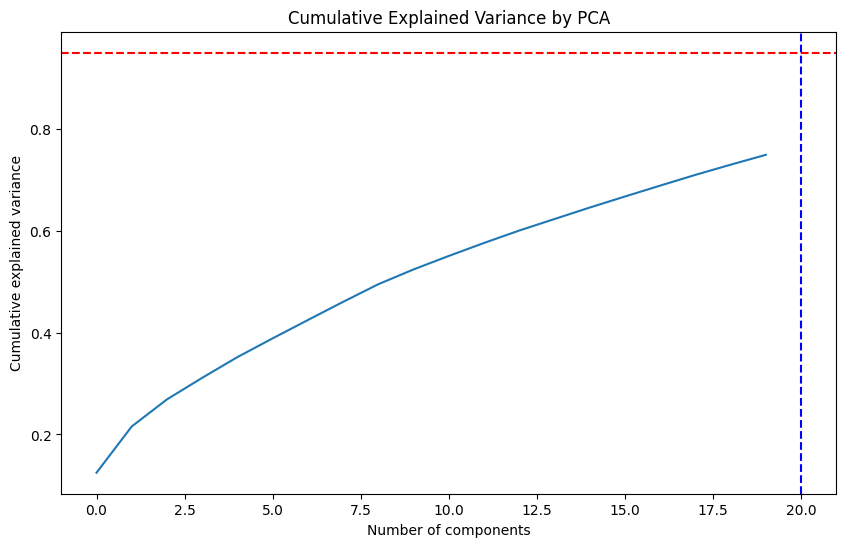

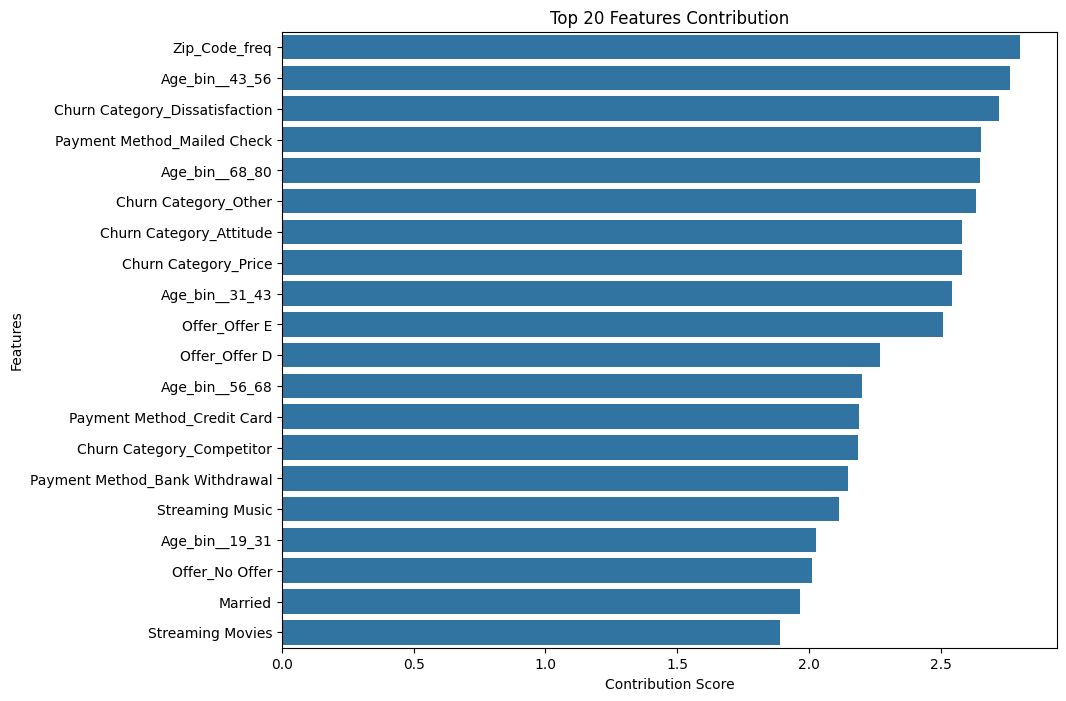

In [253]:
# Applying PCA
pca = PCA(n_components=20, random_state=30)
x_train_pca = pca.fit_transform(x_train_sc_sm)
#x_test_pca = pca.transform(x_test_sc)

# Getting PCA components with importance
components = pca.components_
component_df = pd.DataFrame(components, columns=x_train.columns)
contribution_scores = np.abs(component_df).sum(axis=0)
top_features = contribution_scores.nlargest(20).index

def name_pca_columns(component_df, x_train_columns, num_components=20):
    column_names = []
    for i in range(num_components):
        top_feature = component_df.iloc[i].abs().idxmax()
        column_names.append(f'PC{i+1} ({top_feature})')
    return column_names

pca_column_names = name_pca_columns(component_df, x_train.columns, num_components=20)
x_train_pca_df = pd.DataFrame(data=x_train_pca, columns=pca_column_names)
#x_test_pca_df = pd.DataFrame(data=x_test_pca, columns=pca_column_names)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
n_components = len(explained_variance_ratio)

print(f"Number of components to explain variance: {n_components}")

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by PCA')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components, color='b', linestyle='--')
plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(x=contribution_scores.nlargest(20), y=top_features)
plt.title('Top 20 Features Contribution')
plt.xlabel('Contribution Score')
plt.ylabel('Features')
plt.show()

In [254]:
x_train_pca_df

PC1 (Total Charges)  PC2 (Contract_Month-to-Month)  PC3 (Age)  \
0                2.279255                       2.512754   1.140420   
1                1.193807                       0.593210   3.013472   
2               -3.237313                       2.297211  -1.007687   
3                2.455008                       2.090457   1.516162   
4                1.361814                       1.132993   0.441961   
...                   ...                            ...        ...   
8789            -1.444520                      -1.901258   4.712577   
8790            -2.369254                      -1.505260   3.931174   
8791             0.950970                       0.073461  -2.667705   
8792            -1.114352                      -2.335014  -1.051461   
8793            -1.087932                      -3.168115  -0.916351   

      PC4 (Age)  PC5 (Churn Category_Competitor)  PC6 (Churn Category_Price)  \
0     -0.729079                        -0.292304                    0.749309   
1      1.927168                         0.800745                    1.072547   
2     -0.329817                        -0.233280                   -1.305388   
3     -0.389494                         0.396497                   -0.299760   
4      1.712264                         0.574132                   -0.465405   
...         ...                              ...                         ...   
8789   2.029358                        -1.438640                   -1.442873   
8790  -0.803239                        -1.565620                   -1.984853   
8791   0.457331                        -2.075058                    4.908167   
8792   2.047079                        -1.328216                   -2.155382   
8793  -0.570732                        -2.009865                   -1.236830   

      PC7 (Churn Category_Other)  PC8 (Churn Category_Dissatisfaction)  \
0                      -0.087121                              0.649212   
1                      -0.421522                              0.113143   
2                       0.670252                              0.676045   
3                      -0.120729                             -0.835526   
4                       0.770381                             -0.465180   
...                          ...                                   ...   
8789                   -0.679014                              2.200804   
8790                    4.386696                             -2.810027   
8791                    1.032145                             -0.256270   
8792                   -0.063174                              3.060309   
8793                   -2.986223                             -3.418807   

      PC9 (Gender_Female)  PC10 (Offer_No Offer)  PC11 (Age_bin__68_80)  \
0                1.141535              -0.715560              -1.394705   
1                1.793951              -0.977148              -0.462570   
2               -0.755332              -1.472591              -0.501392   
3               -1.302889               0.289371               0.959983   
4               -0.828601              -1.052631               0.268703   
...                   ...                    ...                    ...   
8789            -2.136847               1.672358              -0.197772   
8790             0.410350               1.742348              -1.418397   
8791            -0.883604               1.587321               0.182022   
8792            -0.041260              -0.053196              -0.052709   
8793            -1.395427               0.704486               0.665630   

      PC12 (Payment Method_Bank Withdrawal)  PC13 (Age_bin__31_43)  \
0                                  0.672088               0.747858   
1                                  1.631626              -1.942494   
2                                  1.374137              -2.459532   
3                                 -1.405843               0.037341   
4                                  0.278432         

### Filter Method - Using Correlation, Chi-square test and Mutual Information

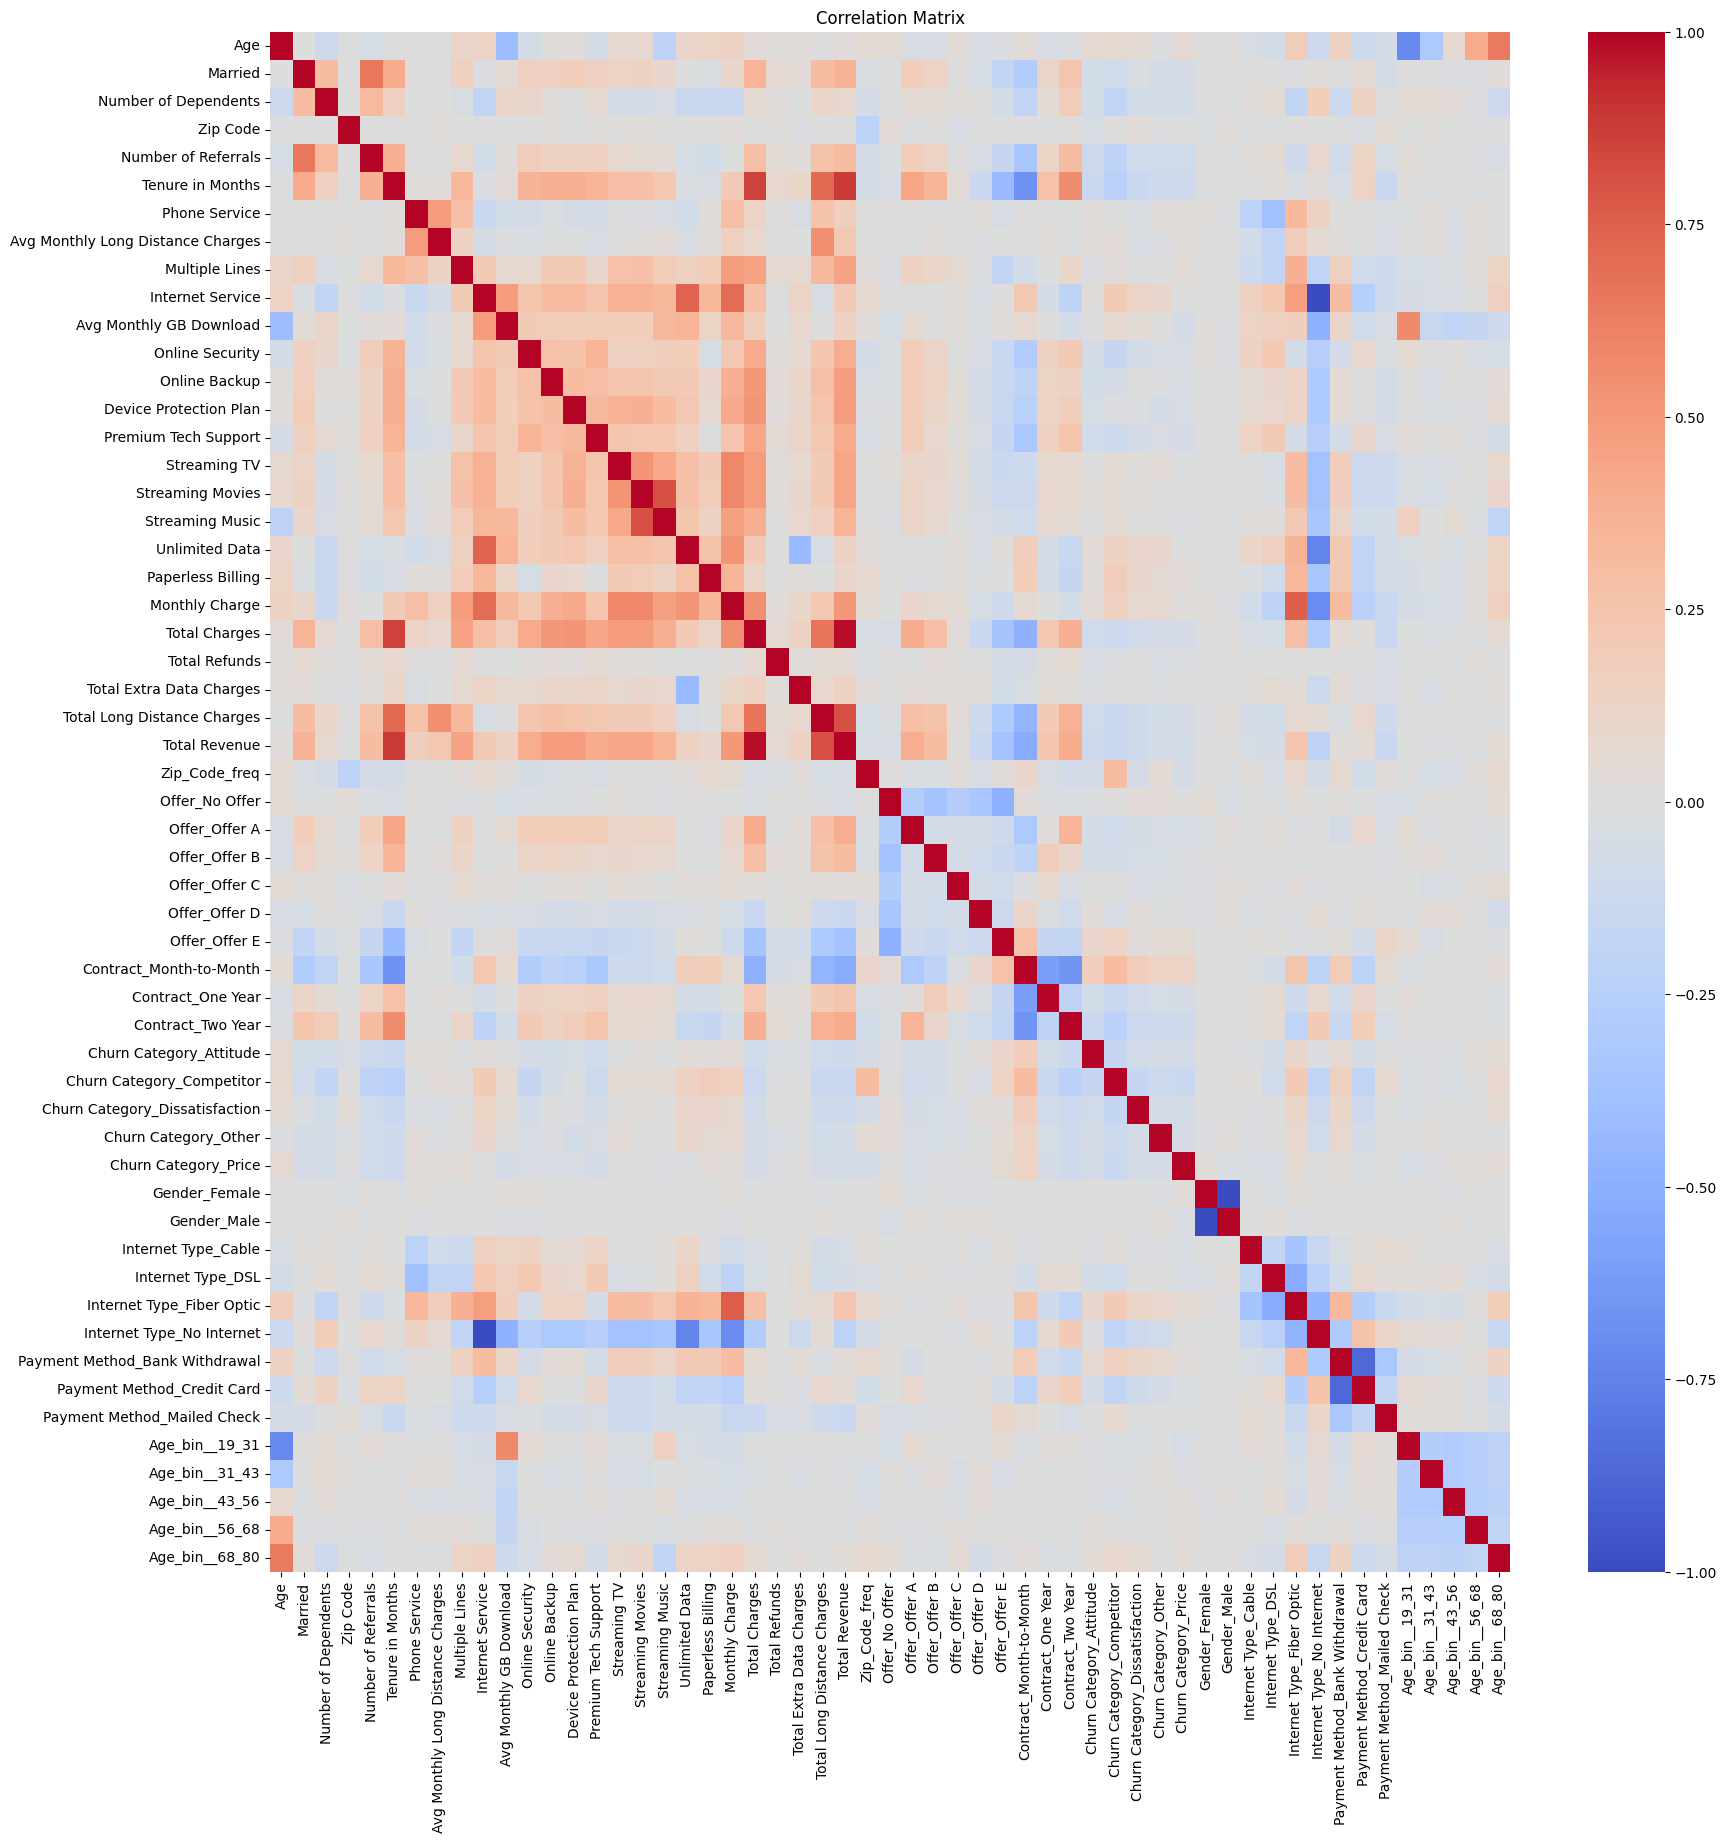

Highly correlated features to be removed: {'Internet Service', 'Gender_Female', 'Tenure in Months', 'Streaming Movies', 'Total Charges', 'Payment Method_Bank Withdrawal', 'Total Long Distance Charges'}
Selected features after removing highly correlated features: Index(['Age', 'Married', 'Number of Dependents', 'Zip Code',
       'Number of Referrals', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Music', 'Unlimited Data', 'Paperless Billing',
       'Monthly Charge', 'Total Refunds', 'Total Extra Data Charges',
       'Total Revenue', 'Zip_Code_freq', 'Offer_No Offer', 'Offer_Offer A',
       'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Churn Category_Attitude', 'Churn Category_Competitor',

In [255]:
corr_matrix = pd.DataFrame(x_train_sc_sm, columns=x_train.columns).corr()

# Correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Removing highly correlated features
threshold = 0.8
high_corr_pairs = np.where(np.abs(corr_matrix) > threshold)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

high_corr_features = set([pair[0] for pair in high_corr_pairs])
print(f"Highly correlated features to be removed: {high_corr_features}")

x_train_filtered_corr = pd.DataFrame(x_train_sc_sm, columns=x_train.columns).drop(columns=high_corr_features)
print(f"Selected features after removing highly correlated features: {x_train_filtered_corr.columns}")


In [256]:
offset = np.abs(x_train_filtered_corr.min(axis=0))
x_train_non_neg = x_train_filtered_corr + offset

# Chi-Square Test
chi_scores = chi2(x_train_non_neg, y_train_sm)
chi_scores_df = pd.DataFrame({'Feature': x_train_filtered_corr.columns, 'Chi-Square Score': chi_scores[0]})
chi_scores_df = chi_scores_df.sort_values(by='Chi-Square Score', ascending=False)

top_chi_features = chi_scores_df['Feature'].head(20).values
print("Top features based on Chi-Square test:")
print(top_chi_features)

Top features based on Chi-Square test:
['Churn Category_Competitor' 'Churn Category_Dissatisfaction'
 'Churn Category_Attitude' 'Churn Category_Price' 'Contract_Two Year'
 'Churn Category_Other' 'Number of Referrals' 'Contract_Month-to-Month'
 'Number of Dependents' 'Internet Type_No Internet' 'Contract_One Year'
 'Offer_Offer E' 'Payment Method_Credit Card' 'Offer_Offer A'
 'Internet Type_Fiber Optic' 'Online Security' 'Total Revenue'
 'Premium Tech Support' 'Offer_Offer B' 'Age_bin__68_80']


In [257]:
# Mutual Information
mutual_info = mutual_info_classif(x_train_filtered_corr, y_train_sm)
mutual_info_df = pd.DataFrame({'Feature': x_train_filtered_corr.columns, 'Mutual Information': mutual_info})
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

top_mi_features = mutual_info_df['Feature'].head(20).values
print("Top features based on Mutual Information:")
print(top_mi_features)

Top features based on Mutual Information:
['Age' 'Avg Monthly GB Download' 'Contract_Month-to-Month'
 'Churn Category_Competitor' 'Number of Referrals' 'Zip_Code_freq'
 'Zip Code' 'Contract_Two Year' 'Paperless Billing' 'Monthly Charge'
 'Payment Method_Credit Card' 'Married' 'Number of Dependents'
 'Internet Type_Fiber Optic' 'Premium Tech Support' 'Online Security'
 'Churn Category_Dissatisfaction' 'Online Backup' 'Streaming TV'
 'Unlimited Data']


In [258]:
common_features = set(top_chi_features).intersection(top_mi_features)

filtered_features = list(common_features)
print("Final common selected features:")
print(filtered_features)

x_train_filtered = pd.DataFrame(x_train_sc_sm, columns=x_train.columns)[filtered_features]


Final common selected features:
['Premium Tech Support', 'Contract_Month-to-Month', 'Number of Referrals', 'Internet Type_Fiber Optic', 'Number of Dependents', 'Contract_Two Year', 'Online Security', 'Churn Category_Dissatisfaction', 'Churn Category_Competitor', 'Payment Method_Credit Card']


### Wrapper Method - Using Recursive feature elimination

In [259]:
# Recursive Feature Elimination (RFE)
model = RandomForestClassifier(random_state=30)
rfe = RFE(model, n_features_to_select=20)
rfe.fit(x_train_filtered_corr, y_train_sm)

rfe_features = x_train_filtered_corr.columns[rfe.support_]
print("Top features based on RFE:")
print(rfe_features)

x_train_wr = pd.DataFrame(x_train_filtered_corr, columns=x_train_filtered_corr.columns)[rfe_features]

Top features based on RFE:
Index(['Age', 'Number of Dependents', 'Zip Code', 'Number of Referrals',
       'Avg Monthly GB Download', 'Online Security', 'Premium Tech Support',
       'Paperless Billing', 'Monthly Charge', 'Total Revenue',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Churn Category_Attitude', 'Churn Category_Competitor',
       'Churn Category_Dissatisfaction', 'Churn Category_Other',
       'Churn Category_Price', 'Internet Type_Fiber Optic',
       'Payment Method_Credit Card'],
      dtype='object')


### Embedded Method - Using LASSO Regression

In [260]:
# LASSO (L1 Regularization)
lasso = LassoCV(alphas=[0.001], cv=5, random_state=30)
lasso.fit(x_train_filtered_corr, y_train_sm)

lasso_features = x_train_filtered_corr.columns[lasso.coef_ != 0]
print("Top features based on LASSO:")
print(lasso_features)

x_train_lasso = pd.DataFrame(x_train_filtered_corr, columns=x_train_filtered_corr.columns)[lasso_features]

Top features based on LASSO:
Index(['Contract_Month-to-Month', 'Churn Category_Attitude',
       'Churn Category_Competitor', 'Churn Category_Dissatisfaction',
       'Churn Category_Other', 'Churn Category_Price'],
      dtype='object')


## Model Selection

### Model Training on PCA Implemented Data Frame

In [261]:
x_train_eval, x_test_eval, y_train_eval, y_test_eval = train_test_split(x_train_pca_df, y_train_sm, test_size=0.2, random_state=30)

# Logistic Regression
model_lr = LogisticRegression(random_state=30)
model_lr.fit(x_train_eval, y_train_eval)

# Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=30)
model_rf.fit(x_train_eval, y_train_eval)

# XGBoost
model_xgb = XGBClassifier(random_state=30)
model_xgb.fit(x_train_eval, y_train_eval)

# Support Vector Machine
model_svm = SVC(kernel='linear', random_state=30) 
model_svm.fit(x_train_eval, y_train_eval)

# Artificial Neural Network
model_nn = MLPClassifier(solver='adam', alpha=0.001, hidden_layer_sizes=(100,), random_state=30)
model_nn.fit(x_train_eval, y_train_eval)


# Predictions
y_pred_lr = model_lr.predict(x_test_eval)
y_pred_rf = model_rf.predict(x_test_eval)
y_pred_xgb = model_xgb.predict(x_test_eval)
y_pred_svm = model_svm.predict(x_test_eval)
y_pred_nn = model_nn.predict(x_test_eval)

# Classification Reports
print("Logistic Regression Classification Report:")
print(classification_report(y_test_eval, y_pred_lr))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test_eval, y_pred_rf))

print("\nXGBoost Classification Report:")
print(classification_report(y_test_eval, y_pred_xgb))

print("\nSVM Classification Report:")
print(classification_report(y_test_eval, y_pred_svm))

print("\nNeural Network Classification Report:")
print(classification_report(y_test_eval, y_pred_nn))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       893
           1       0.84      0.90      0.87       866

    accuracy                           0.87      1759
   macro avg       0.87      0.87      0.87      1759
weighted avg       0.87      0.87      0.87      1759


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       893
           1       0.99      1.00      1.00       866

    accuracy                           1.00      1759
   macro avg       1.00      1.00      1.00      1759
weighted avg       1.00      1.00      1.00      1759


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       893
           1       1.00      1.00      1.00       866

    accuracy                           1.00      1759
   macro avg   

### Model Training on Filtered Data Frame

In [262]:
x_train_eval, x_test_eval, y_train_eval, y_test_eval = train_test_split(x_train_filtered, y_train_sm, test_size=0.2, random_state=30)

# Logistic Regression
model_lr = LogisticRegression(random_state=30)
model_lr.fit(x_train_eval, y_train_eval)

# Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=30)
model_rf.fit(x_train_eval, y_train_eval)

# XGBoost
model_xgb = XGBClassifier(random_state=30)
model_xgb.fit(x_train_eval, y_train_eval)

# Support Vector Machine
model_svm = SVC(kernel='linear', random_state=30) 
model_svm.fit(x_train_eval, y_train_eval)

# Artificial Neural Network 
model_nn = MLPClassifier(solver='adam', alpha=0.001, hidden_layer_sizes=(100,), random_state=30)
model_nn.fit(x_train_eval, y_train_eval)


# Predictions
y_pred_lr = model_lr.predict(x_test_eval)
y_pred_rf = model_rf.predict(x_test_eval)
y_pred_xgb = model_xgb.predict(x_test_eval)
y_pred_svm = model_svm.predict(x_test_eval)
y_pred_nn = model_nn.predict(x_test_eval)

# Classification Reports
print("Logistic Regression Classification Report:")
print(classification_report(y_test_eval, y_pred_lr))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test_eval, y_pred_rf))

print("\nXGBoost Classification Report:")
print(classification_report(y_test_eval, y_pred_xgb))

print("\nSVM Classification Report:")
print(classification_report(y_test_eval, y_pred_svm))

print("\nNeural Network Classification Report:")
print(classification_report(y_test_eval, y_pred_nn))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       893
           1       0.87      0.90      0.88       866

    accuracy                           0.88      1759
   macro avg       0.88      0.88      0.88      1759
weighted avg       0.88      0.88      0.88      1759


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       893
           1       0.93      0.90      0.92       866

    accuracy                           0.92      1759
   macro avg       0.92      0.92      0.92      1759
weighted avg       0.92      0.92      0.92      1759


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       893
           1       0.94      0.90      0.92       866

    accuracy                           0.92      1759
   macro avg   

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Model Training on Wrapped Data Frame

In [263]:
x_train_eval, x_test_eval, y_train_eval, y_test_eval = train_test_split(x_train_wr, y_train_sm, test_size=0.2, random_state=30)

# Logistic Regression
model_lr = LogisticRegression(random_state=30)
model_lr.fit(x_train_eval, y_train_eval)

# Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=30)
model_rf.fit(x_train_eval, y_train_eval)

# XGBoost
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(x_train_eval, y_train_eval)

# Support Vector Machine
model_svm = SVC(kernel='linear', random_state=30)  
model_svm.fit(x_train_eval, y_train_eval)

# Artificial Neural Network (ANN - Multi-Layer Perceptron)
model_nn = MLPClassifier(solver='adam', alpha=0.001, hidden_layer_sizes=(100,), random_state=30)
model_nn.fit(x_train_eval, y_train_eval)


# Predictions
y_pred_lr = model_lr.predict(x_test_eval)
y_pred_rf = model_rf.predict(x_test_eval)
y_pred_xgb = model_xgb.predict(x_test_eval)
y_pred_svm = model_svm.predict(x_test_eval)
y_pred_nn = model_nn.predict(x_test_eval)

# Classification Reports
print("Logistic Regression Classification Report:")
print(classification_report(y_test_eval, y_pred_lr))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test_eval, y_pred_rf))

print("\nXGBoost Classification Report:")
print(classification_report(y_test_eval, y_pred_xgb))

print("\nSVM Classification Report:")
print(classification_report(y_test_eval, y_pred_svm))

print("\nNeural Network Classification Report:")
print(classification_report(y_test_eval, y_pred_nn))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       893
           1       1.00      1.00      1.00       866

    accuracy                           1.00      1759
   macro avg       1.00      1.00      1.00      1759
weighted avg       1.00      1.00      1.00      1759


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       893
           1       1.00      1.00      1.00       866

    accuracy                           1.00      1759
   macro avg       1.00      1.00      1.00      1759
weighted avg       1.00      1.00      1.00      1759


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       893
           1       1.00      1.00      1.00       866

    accuracy                           1.00      1759
   macro avg   

### Model Training on Embedded Data Frame

In [264]:
x_train_eval, x_test_eval, y_train_eval, y_test_eval = train_test_split(x_train_lasso, y_train_sm, test_size=0.2, random_state=30)

# Logistic Regression
model_lr = LogisticRegression(random_state=30)
model_lr.fit(x_train_eval, y_train_eval)

# Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=30)
model_rf.fit(x_train_eval, y_train_eval)

# XGBoost
model_xgb = XGBClassifier(random_state=30)
model_xgb.fit(x_train_eval, y_train_eval)

# Support Vector Machine
model_svm = SVC(kernel='linear', random_state=30) 
model_svm.fit(x_train_eval, y_train_eval)

# Artificial Neural Network 
model_nn = MLPClassifier(solver='adam', alpha=0.001, hidden_layer_sizes=(100,), random_state=30)
model_nn.fit(x_train_eval, y_train_eval)


# Predictions
y_pred_lr = model_lr.predict(x_test_eval)
y_pred_rf = model_rf.predict(x_test_eval)
y_pred_xgb = model_xgb.predict(x_test_eval)
y_pred_svm = model_svm.predict(x_test_eval)
y_pred_nn = model_nn.predict(x_test_eval)

# Classification Reports
print("Logistic Regression Classification Report:")
print(classification_report(y_test_eval, y_pred_lr))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test_eval, y_pred_rf))

print("\nXGBoost Classification Report:")
print(classification_report(y_test_eval, y_pred_xgb))

print("\nSVM Classification Report:")
print(classification_report(y_test_eval, y_pred_svm))

print("\nNeural Network Classification Report:")
print(classification_report(y_test_eval, y_pred_nn))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       893
           1       1.00      1.00      1.00       866

    accuracy                           1.00      1759
   macro avg       1.00      1.00      1.00      1759
weighted avg       1.00      1.00      1.00      1759


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       893
           1       1.00      1.00      1.00       866

    accuracy                           1.00      1759
   macro avg       1.00      1.00      1.00      1759
weighted avg       1.00      1.00      1.00      1759


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       893
           1       1.00      1.00      1.00       866

    accuracy                           1.00      1759
   macro avg   

### Candidate Models

Here, Models with an accuracy of 1.00 in data frames of Wrapped and Embedded method indicating overfitting. This suggests that the models may not properly generalize to unseen data.

The Filtered Data Frame approach shows more reasonable and balanced performance across the models, indicating better generalization. The highest accuracy here is around 0.91 with Random Forest and XGBoost, which is more realistic.

On the other hand, PCA has slightly improved logistic regression and SVM performance compared to the Filtered Data Frame but still falls short in terms of generalization as compared to ensemble methods like Random Forest and XGBoost.

Therefore, we will continue to further hypertuning with the mentioned model on the filtered data frame.
1. Random Forest
2. XGBoost

## Model Evaluation

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{title} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_classification_report(y_true, y_pred, title):
    report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='Blues')
    plt.title(f'{title} Classification Report')
    plt.show()

def plot_roc_curve(y_true, y_pred, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{title} ROC Curve')
    plt.legend(loc='best')
    plt.show()


In [266]:
x_test_filtered = pd.DataFrame(x_test_sc, columns=x_train.columns)[filtered_features]

Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Score for Random Forest: 0.9171286425017768
Best Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       893
           1       0.93      0.90      0.92       866

    accuracy                           0.92      1759
   macro avg       0.92      0.92      0.92      1759
weighted avg       0.92      0.92      0.92      1759



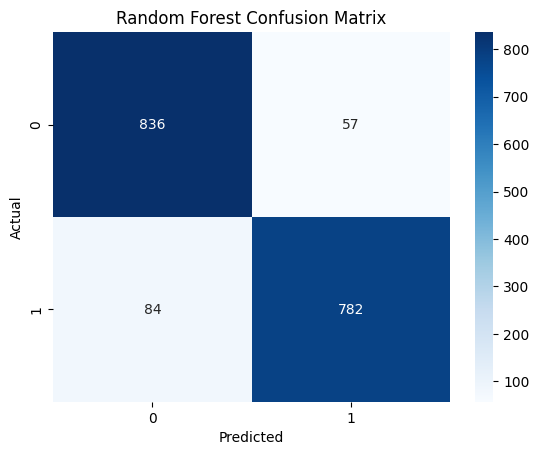

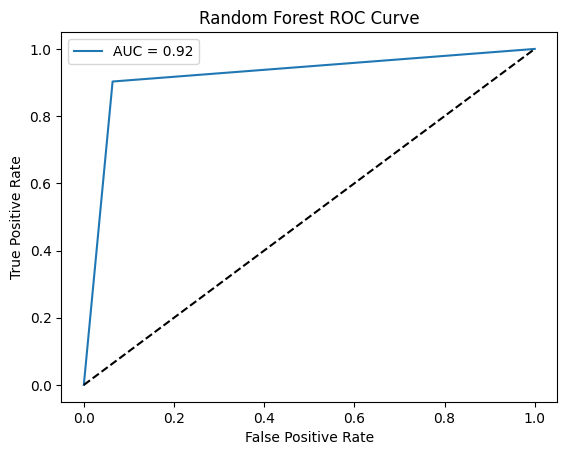

In [267]:
x_train_eval, x_test_eval, y_train_eval, y_test_eval = train_test_split(x_train_filtered, y_train_sm, test_size=0.2, random_state=30)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


rf_model = RandomForestClassifier(random_state=30)

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(x_train_eval, y_train_eval)

best_rf_model = grid_search_rf.best_estimator_
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best Cross-Validation Score for Random Forest: {grid_search_rf.best_score_}")

y_pred_best_rf = best_rf_model.predict(x_test_eval)
print("Best Random Forest Model Classification Report:")
print(classification_report(y_test_eval, y_pred_best_rf))
plot_confusion_matrix(y_test_eval, y_pred_best_rf, "Random Forest")
plot_roc_curve(y_test_eval, y_pred_best_rf, "Random Forest")

D:\Anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:32:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best Cross-Validation Score for XGBoost: 0.9223880597014926
Best XGBoost Model Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       893
           1       0.93      0.90      0.92       866

    accuracy                           0.92      1759
   macro avg       0.92      0.92      0.92      1759
weighted avg       0.92      0.92      0.92      1759



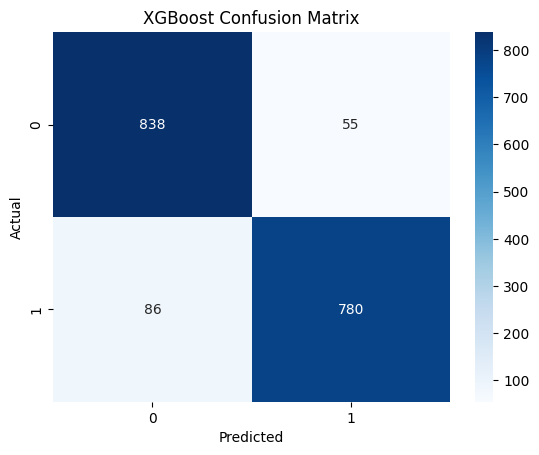

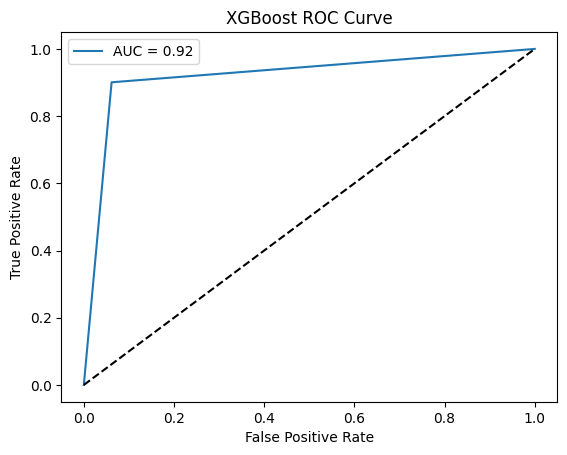

In [268]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = xgb.XGBClassifier(random_state=30, use_label_encoder=False, eval_metric='logloss')

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train_eval, y_train_eval)

best_xgb_model = grid_search_xgb.best_estimator_
print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best Cross-Validation Score for XGBoost: {grid_search_xgb.best_score_}")

y_pred_best_xgb = best_xgb_model.predict(x_test_eval)
print("Best XGBoost Model Classification Report:")
print(classification_report(y_test_eval, y_pred_best_xgb))
plot_confusion_matrix(y_test_eval, y_pred_best_xgb, "XGBoost")
plot_roc_curve(y_test_eval, y_pred_best_xgb, "XGBoost")


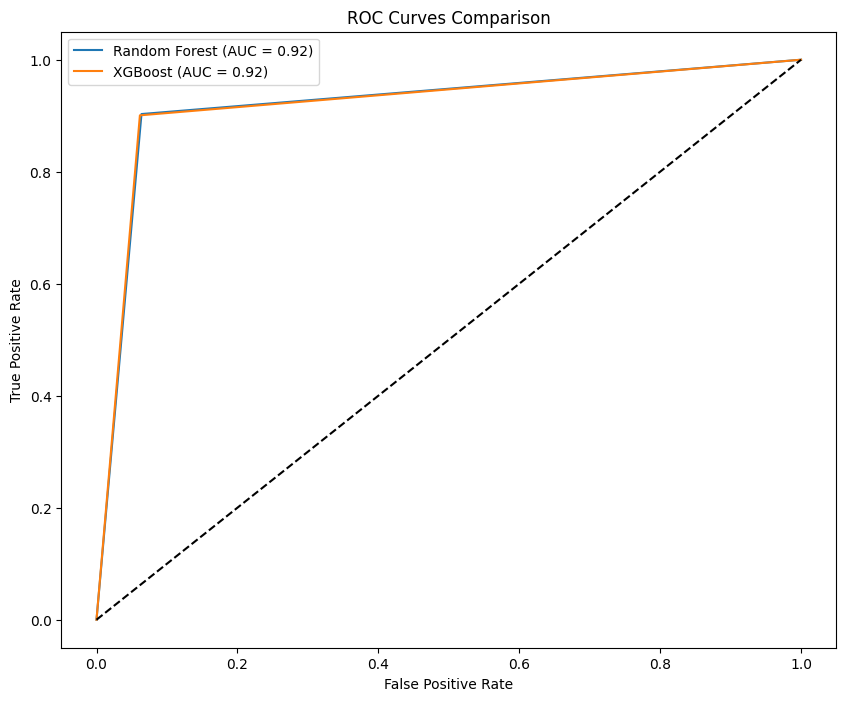

In [269]:
# Compare ROC Curves
plt.figure(figsize=(10, 8))

# Random Forest ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test_eval, best_rf_model.predict(x_test_eval))
auc_rf = roc_auc_score(y_test_eval, best_rf_model.predict(x_test_eval))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# XGBoost ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_eval, best_xgb_model.predict(x_test_eval))
auc_xgb = roc_auc_score(y_test_eval, best_xgb_model.predict(x_test_eval))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='best')
plt.show()


Best XGBoost Model Train Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4397
           1       0.95      0.90      0.92      4397

    accuracy                           0.92      8794
   macro avg       0.92      0.92      0.92      8794
weighted avg       0.92      0.92      0.92      8794



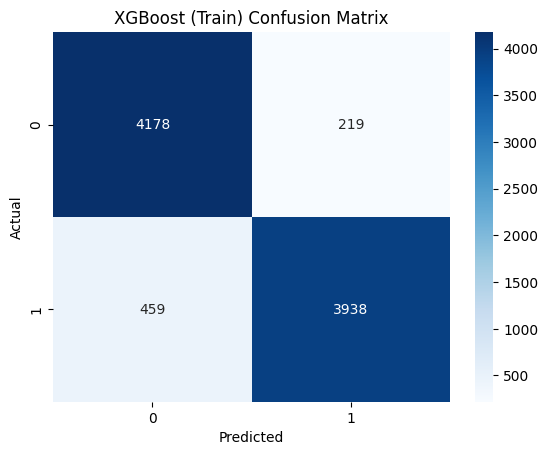

In [277]:
# Train results
y_train_pred_xgb = best_xgb_model.predict(x_train_filtered)
print("Best XGBoost Model Train Classification Report:")
print(classification_report(y_train_sm, y_train_pred_xgb))

plot_confusion_matrix(y_train_sm, y_train_pred_xgb, "XGBoost (Train)")

Best XGBoost Model Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       777
           1       0.82      0.76      0.79       280

    accuracy                           0.89      1057
   macro avg       0.87      0.85      0.86      1057
weighted avg       0.89      0.89      0.89      1057



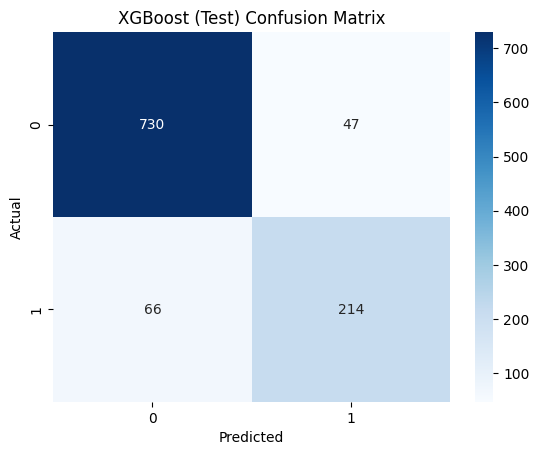

In [278]:
# Test results
y_test_pred_xgb = best_xgb_model.predict(x_test_filtered)
print("Best XGBoost Model Test Classification Report:")
print(classification_report(y_test, y_test_pred_xgb))

plot_confusion_matrix(y_test, y_test_pred_xgb, "XGBoost (Test)")


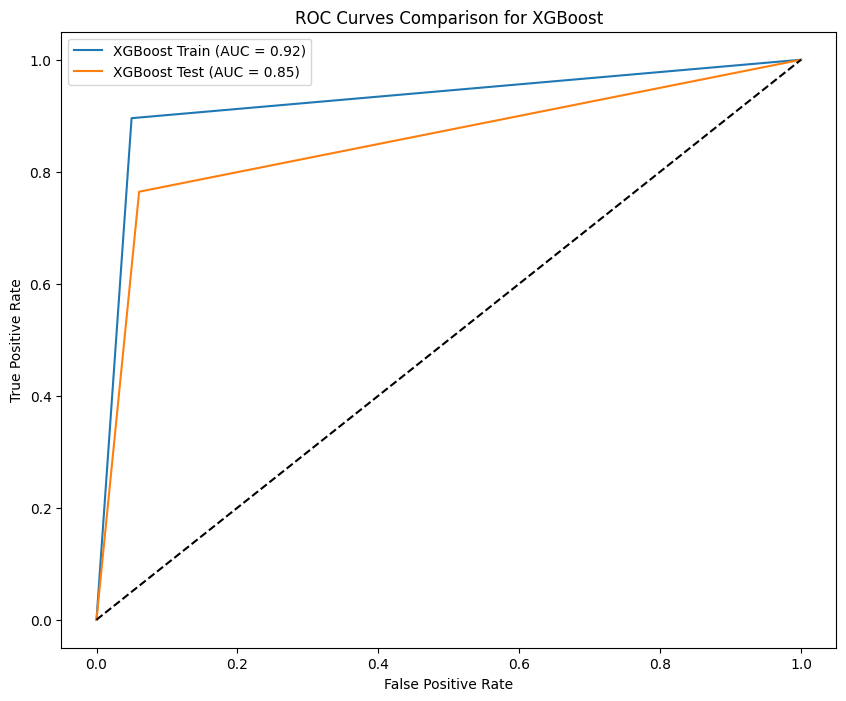

In [279]:
# Combined ROC Curve
plt.figure(figsize=(10, 8))

# Train ROC Curve
fpr_train_xgb, tpr_train_xgb, _ = roc_curve(y_train_sm, y_train_pred_xgb)
roc_auc_train_xgb = auc(fpr_train_xgb, tpr_train_xgb)
plt.plot(fpr_train_xgb, tpr_train_xgb, label=f'XGBoost Train (AUC = {roc_auc_train_xgb:.2f})')

# Test ROC Curve
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, y_test_pred_xgb)
roc_auc_test_xgb = auc(fpr_test_xgb, tpr_test_xgb)
plt.plot(fpr_test_xgb, tpr_test_xgb, label=f'XGBoost Test (AUC = {roc_auc_test_xgb:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison for XGBoost')
plt.legend(loc='best')
plt.show()

XGBoost SHAP Waterfall Plot


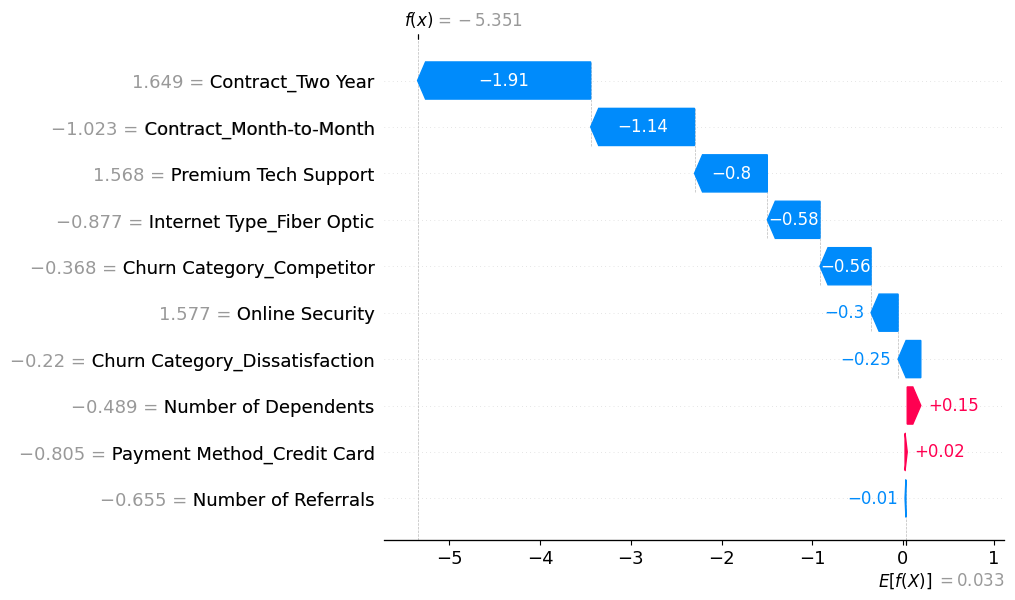

In [280]:
explainer_xgb = shap.Explainer(best_xgb_model)
shap_values_xgb = explainer_xgb(x_test_filtered)

print("XGBoost SHAP Waterfall Plot")
shap.plots.waterfall(shap_values_xgb[0])

XGBoost SHAP Beeswarm Plot


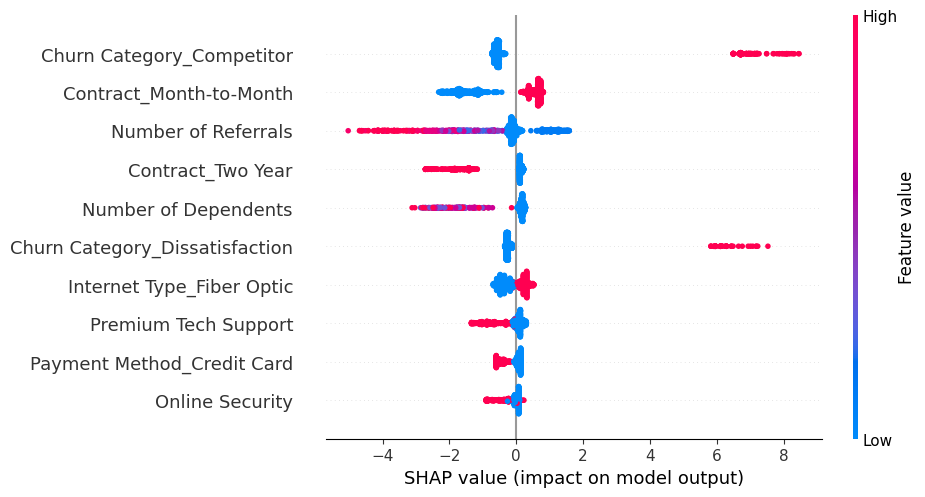

In [281]:
print("XGBoost SHAP Beeswarm Plot")
shap.plots.beeswarm(shap_values_xgb)

XGBoost SHAP Bar Plot


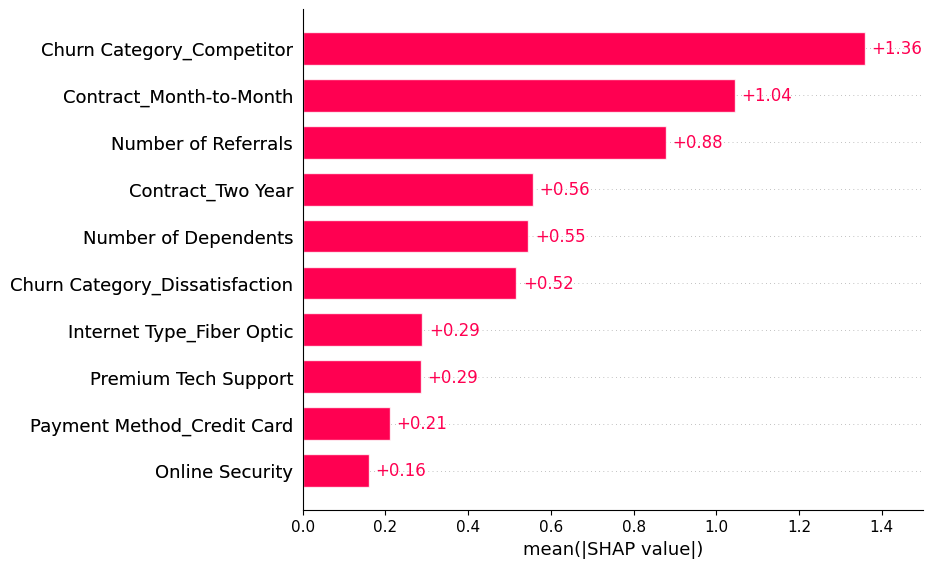

In [282]:
print("XGBoost SHAP Bar Plot")
shap.plots.bar(shap_values_xgb)